In [1]:
# ASTR 400 B 
# In Class Lab 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#makes it so you don't need to say plt.show every time you plot
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+2009 for Field Galaxies in SDSS at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to ignore it here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [2]:
# Function for the Schechter Luminosity function (in terms of Magnitude)
def Schechter(M,phistar=0.0166,Mstar=-23.19,alpha=-0.81):
    
# Inputs:  
# an array of Absolute Magnitudes M 
# phistar, number density of galaxies (normalization)
#              0.0166*h^3 Mpc^-3  defaults from Smith+2009 in Kband
# Mstar (Knee of the Schechter Fxn):
#           -23.19 - 5*log(h) defaults from Smith+2009 in Kband
# alpha (Slope of the Fxn) 
#             -0.81 defaults from Smith+2009 in Kband


# Returns: 
#number density of galaxies (comoving units) at that magnitude M.

    return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [3]:
# Create an array to store Kband Magnitudes from -26 to -17
MK=np.arange(-26,-17,0.1)

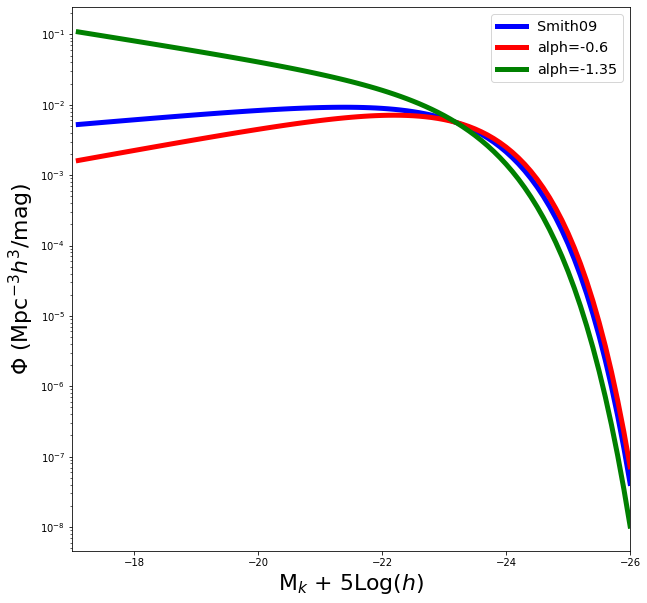

In [4]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
ax.semilogy(MK, Schechter(MK), color='b', linewidth=5, label='Smith09')


# Q2 solutions: change alpha
ax.semilogy(MK, Schechter(MK,alpha=-0.6), color='r', linewidth=5, label='alph=-0.6')
ax.semilogy(MK, Schechter(MK,alpha=-1.35), color='g', linewidth=5, label='alph=-1.35')


# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
#ax.set_rasterized(True)
#plt.savefig('Schechter.eps', rasterized=True, dpi=350)



## Part B: IMF 

Create a function called {\it Salpeter} that defines the Salpeter IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}

$\alpha = 2.35$
The function should take as input an array of stellar masses, M. 
You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from 0.1 to 120 M$_\odot$
and setting the value to 1.  The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration: quad(lambda x:  fxn(x),xmin,xmax)

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

## Q1: 
Integrate your normalized function to compute the fraction of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


## Q2:

How might you modify the above to return the fraction of MASS ? instead of numbers of stars.